# Playing with different classification algorithms

In [44]:
# Importing packages

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading and plotting our data
You can ignore the following two functions, they are mostly for plotting.

In [46]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')
    
    return X,y

def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

    r = np.linspace(-0.1,1.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

# Looking at the data
Here are the two datasets we'll be working with. Pick one by uncommenting the correct line.

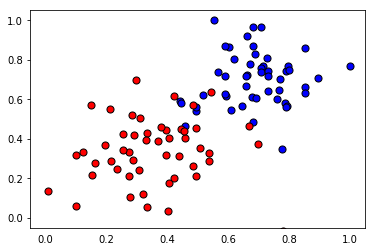

In [62]:
# Nice linearly separable dataset
X, y = load_pts('files/2class_overlap.csv')

# Slightly more complicated dataset
#X, y = load_pts('files/egg_data.csv')

# More complicated dataset
#X, y = load_pts('files/2eggs_data.csv')
plt.show()

# Trying different algorithms
Uncomment each line and feel free to change the parameters of each algorithm. Try to fit the dataset as well as possible. Here we have:
- Logistic Regression
- Support Vector Machines
- Decision Trees
- AdaBoost

Accuracy:  0.93


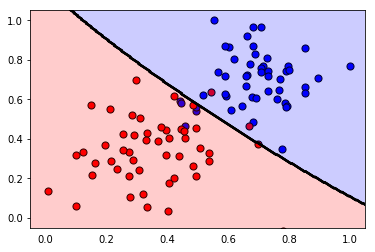

In [63]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the model and the parameters

# Logistic Regression
#classifier = LogisticRegression()

# Support Vector Machines
#classifier = SVC(kernel = 'linear', C=1)
#classifier = SVC(kernel='rbf', gamma=1)
#classifier = SVC(kernel='poly', degree=4)

# Decision Trees
#classifier = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1)

# Naive Bayes
#classifier = GaussianNB()

# AdaBoost
#classifier = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 18)
#classifier = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators = 10)

# Fit the model
classifier.fit(X,y)

# Make predictions
y_pred = classifier.predict(X)

# Calculate the accuracy
acc = accuracy_score(y_pred, y)
print("Accuracy: ", acc)

# Plot model
plot_model(X, y, classifier)

# Challenge Question: For each of the datasets, which algorithm and which parameters gave us the best fit? Why?